# 2022 Shopify Challenge

In [57]:
# importing the required libraries
import pandas as pd
import hvplot.pandas
import plotly.express as px
import panel as pn
from panel.interact import interact
from panel import widgets
pn.extension()

# loading the dataset into a pandas dataframe

In [58]:
# using a pd data frame to load the data and begin to explore the data
data = pd.read_csv('RawData/data.csv' , infer_datetime_format=True, parse_dates=['created_at'])
# checking the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
 7   shoe_price      5000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 312.6+ KB


In [59]:
# need to convert payments methods to the correct format
data['payment_method'] = data['payment_method'].astype('string')
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   string        
 6   created_at      5000 non-null   datetime64[ns]
 7   shoe_price      5000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), string(1)
memory usage: 312.6 KB


None

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,shoe_price
0,1,53,746,224,2,cash,2017-03-13 12:36:00,112
1,2,92,925,90,1,cash,2017-03-03 17:38:00,90
2,3,44,861,144,1,cash,2017-03-14 04:23:00,144
3,4,18,935,156,1,credit_card,2017-03-26 12:43:00,156
4,5,18,883,156,1,credit_card,2017-03-01 04:35:00,156


In [60]:
# output some statistics about the data
data.describe()

,order_id,shop_id,user_id,order_amount,total_items,shoe_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


Since there was describe function output above we clearly see that the order amount has some outlier data causing the mean to be higher than expected with values of **704000** for the order amount so lets investigate the data further.

Lets explore the data further by plotting the distibution of the order amount.

In [61]:
data.hvplot.scatter(x='order_id' , y = 'order_amount') 

:Scatter   [order_id]   (order_amount)

if we examine the data we can see that the order amount has some points that are far above the the avarage order amount of $3145.13 and thus its not only the 704000 value in question. 
if we zoom in we can see multiple orders of 25725 also so we will focus the order amount above 25000 for the further analysis below 

In [62]:
# created a new data frame to store the data for the above 25000 order amount to investigate further based on the shop
temp_for_above_25k = data.loc[data['order_amount'] > 25000] 
duplicated_for_25k = temp_for_above_25k['created_at'].duplicated()
result_for_above_25k = pd.concat([temp_for_above_25k, duplicated_for_25k], axis=1 , names=['created_at', 'duplicated'])
result_for_above_25k.to_csv('RawData/result_for_above_25K.csv')
temp_for_above_25k.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,shoe_price
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:00,25725
490,491,78,936,51450,2,debit,2017-03-26 17:08:00,25725
493,494,78,983,51450,2,cash,2017-03-16 21:39:00,25725


In [63]:
# create a list of user data
user = temp_for_above_25k['user_id']

# charting a histogram of the data to investigate the distribution of the data by shop and users 
def shop_plot(user_number):
    chart_by_shop =temp_for_above_25k.hvplot.hist( 
                    y='order_amount', 
                    by = 'shop_id' ,
                    title='Orders Above 25K By Shop' , 
                    rot=45 , xlabel='Order Amount in $' , 
                    ylabel='Frequency' , 
                     )
    return chart_by_shop 

def user_plot (user_number):
    chart_by_user =temp_for_above_25k.hvplot.hist( 
                    y='order_amount', 
                    by = 'user_id' ,
                    title='Orders Above 25K By User' , 
                    rot=45 , xlabel='Order Amount in $' , 
                    ylabel='Frequency' ,
                    )
    return chart_by_user

interact(user_plot , user_number = user.unique())


Column
    [0] Column
        [0] DiscreteSlider(formatter='%d', name='user_number', options=[607, 990, 936, ...], value=607)
    [1] Row
        [0] HoloViews(NdOverlay, name='interactive18517')

In [64]:
px.histogram(
    temp_for_above_25k,
    x = 'order_amount',
    color= 'shop_id',
    nbins=100
)

## Let us now transform the data to do some time series analysis in order to have more metrics to meaasure the performance on these stores asa oppsed to basic statistics

In [65]:
data_time_indexed = data.set_index('created_at')
data_time_indexed = data_time_indexed.sort_index()

In [66]:
data_time_indexed.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,shoe_price
created_at,,,,,,,
2017-03-01 00:08:00,1863,39,738,536,4,cash,134
2017-03-01 00:10:00,1742,39,910,268,2,cash,134
2017-03-01 00:14:00,3229,97,912,324,2,cash,162
2017-03-01 00:19:00,1268,80,798,290,2,credit_card,145
2017-03-01 00:22:00,2690,49,799,258,2,credit_card,129


In [67]:
# claculate some extra metrics from this data 

# avg shoe price per order 
data_time_indexed['shoe_price'] = data_time_indexed.order_amount/data_time_indexed.total_items

In [68]:
data_time_indexed['order_amount'].groupby(by = [data_time_indexed.index.dayofweek]).mean()

created_at
0     830.097638
1    5522.590258
2    2316.628502
3    2673.494662
4    3621.372434
5    4079.881481
6    3040.798762
Name: order_amount, dtype: float64

In [69]:
data_time_indexed['order_amount'].groupby(data_time_indexed.index.hour).count().hvplot()

:Curve   [created_at]   (order_amount)

In [70]:
data_time_indexed['order_amount'].groupby(data_time_indexed.index.day).sum().hvplot()

:Curve   [created_at]   (order_amount)

In [71]:
df= data_time_indexed.loc[(data_time_indexed['order_amount'] > 1000) & (data_time_indexed['user_id'] != 607)]
px.scatter(
    df,
    x = df.index,
    y = 'order_amount',
    color= 'total_items',
    size = 'order_amount',
    title='Bar Chart of Order Amounts above $1000 by Total Amount '

)

In [72]:
px.histogram(
    data_time_indexed.loc[(data_time_indexed['order_amount'] >1000) & (data_time_indexed['order_amount'] < 200000)],
    x = 'order_amount',
    color='user_id',
    nbins=50,
    title='Distribution of Order Amounts between $1000 and $2000000 by User'
    
)

In [73]:
user_878_df = data_time_indexed.loc[data_time_indexed['user_id'] == 878 ]



<AxesSubplot:xlabel='created_at'>

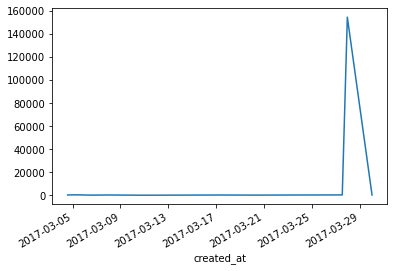

In [74]:
user_878_df['order_amount'].plot()

In [75]:
per_store_mean_df = data_time_indexed.reset_index()
per_store_mean_df = data_time_indexed.groupby(by='shop_id').mean()
per_store_mean_df.head()

,order_id,user_id,order_amount,total_items,shoe_price
shop_id,,,,,
1,2514.568182,833.613636,308.818182,1.954545,158.0
2,2299.054545,861.272727,174.327273,1.854545,94.0
3,2305.875000,847.708333,305.250000,2.062500,148.0
4,2747.607843,866.450980,258.509804,2.019608,128.0
5,2498.288889,862.222222,290.311111,2.044444,142.0


In [77]:


px.bar(
    per_store_mean_df,
    x = per_store_mean_df.index,
    y = ['shoe_price' , 'order_amount'],
    log_y=True,
    width=1000,
    title= 'Average $ Amount for per shoe and order amount per store '
     
)

In [82]:
top_10_user_by_purchase = data_time_indexed.groupby(by='user_id').sum().nlargest(10,'order_amount')
top_10_user_by_purchase.head()      

,order_id,shop_id,order_amount,total_items,shoe_price
user_id,,,,,
607,39716,714,11968000,34000,5984.0
878,27978,670,156936,24,27157.0
834,47806,1018,108342,38,28455.0
787,70323,1191,85707,57,29574.0
969,66289,1007,84269,50,29046.0


In [86]:

px.scatter(
    top_10_user_by_purchase,
    x = top_10_user_by_purchase.index,
    y = 'order_amount',
    color='shop_id',
    size= 'order_amount'
       
)


In [92]:
# removing the top 1 data point from the above list
px.scatter(
    top_10_user_by_purchase.loc[top_10_user_by_purchase.index != 607],
    x = top_10_user_by_purchase.loc[top_10_user_by_purchase.index != 607].index,
    y = 'order_amount',
    color='order_amount',
    size= 'order_amount',
    title= 'Top Users based on amount spent',
    color_continuous_scale='turbo'
       
)